In [10]:
import os                          # Interacting with the file system, manipulating paths, environment variables, etc. 
import random                      # Generating random numbers
import pandas as pd                # Data manipulation and analysis
import numpy as np                 # Fundamental package for scientific computing with Python
import seaborn as sns              # Data visualization library based on matplotlib
import matplotlib.pyplot as plt    # A comprehensive library for creating static, animated, and interactive visualizations(line plots, scatter plots, histograms,etc)
import tensorflow as tf            # An open-source machine learning framework developed by Google 

In [11]:
data_set = 'Dataset/AID'
classes = os.listdir(data_set)    # used to get list of files within the specified directory
len(classes)
print(classes)

['Airport', 'BareLand', 'BaseballField', 'Beach', 'Bridge', 'Center', 'Church', 'Commercial', 'DenseResidential', 'Desert', 'Farmland', 'Forest', 'Industrial', 'Meadow', 'MediumResidential', 'Mountain', 'Park', 'Parking', 'Playground', 'Pond', 'Port', 'RailwayStation', 'Resort', 'River', 'School', 'SparseResidential', 'Square', 'Stadium', 'StorageTanks', 'Viaduct']


In [ ]:
# Function to show random image from the dataset 

def random_sample(img_class='all'):                         # specify the class of images to select from the dataset
    if img_class == 'all':
        class_name = random.choice(classes)
        class_set = os.path.join(data_set, class_name)      # It constructs the path to the directory containing images for the randomly chosen class.
        imgs = os.listdir(class_dir)                        # This line lists all the images in the directory corresponding to the randomly chosen class.
        rndm_img_name = random.choice(imgs)                 # It randomly selects an image from the list of images in the class directory.
        img_path = os.path.join(class_set, rndm_img_name)   # This line constructs the path to the randomly chosen image.
        img = plt.imread(img_path)                          # It reads the image from the path
        
    elif img_class in classes:
        class_name = img_class
        class_dir = os.path.join(data_set, class_name)
        imgs = os.listdir(class_dir)
        rndm_img_name = random.choice(imgs)
        img_path = os.path.join(class_dir, rndm_img_name)
        img = plt.imread(img_path)
    
    else:
        print("Please choosetest_gen an appropriate value as 'img_class'")
    
    plt.imshow(img)                                        # Displays the image
    plt.title(f"{class_name}{img.shape}")
    plt.axis(False)                                        # Removes the axis from the plot
    plt.show()
    
    return img

In [ ]:
img = random_sample(img_class='Airport')

In [ ]:
# Lists all the images in the directory corresponding to the current class
for c in classes:
    class_dir = os.path.join(data_set, c)                   # Constructs the path to the directory containing images for the current class 
    imgs = os.listdir(class_dir)                            # Lists all the images in the directory corresponding to the current class
    print(f"There are {len(imgs)} images in '{c}' class")   

In [ ]:
# Create train, test and validation sets
import splitfolders
splitfolders.ratio(data_set, output='output')

In [ ]:
from PIL import Image

# Function to get image size
def get_image_size(image_path):
    with Image.open(image_path) as img:
        return img.size

# Dictionary to store the count of images in each class
image_counts = {}

# Iterate through each class folder
for class_name in classes:
    class_dir = os.path.join(data_set, class_name)
    # List all image files in the class directory
    image_files = [f for f in os.listdir(class_dir) if f.endswith('.jpg') or f.endswith('.png')]
    
    # Get the image size of a sample image from the class
    if len(image_files) > 0:
        sample_image_path = os.path.join(class_dir, image_files[0])
        image_size = get_image_size(sample_image_path)
        print(f"Class: {class_name}, Image size: {image_size}")
        
    # Count the number of images in the class
    image_counts[class_name] = len(image_files)

# Plotting the distribution of images across classes
plt.figure(figsize=(10, 6))
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()))
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images Across Classes')
plt.xticks(rotation=45)
plt.show()

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf                                                             # deep learning framework
from tensorflow.keras.preprocessing.image import ImageDataGenerator                 # A utility to generate batches of tensor image data with real-time data augmentation
from tensorflow.keras.applications import ResNet50                                  # A pre-trained convolutional neural network model
from tensorflow.keras.models import Model                                           # Various components for building neural network models
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten    
from sklearn.metrics import classification_report, confusion_matrix                 # Tools for evaluating classification performance
from tensorflow.keras.callbacks import EarlyStopping                                # A callback to stop training when a monitored metric has stopped improving

# Set random seed for reproducibility
tf.random.set_seed(42)                                                              # Ensures consistent and reproducible random number generation across runs
np.random.seed(42)

# Data directories
train_dir = "C:\\Users\\vikas\\OneDrive\\Desktop\\SEM2_PROJECTS\\EEE\\EEE_Pro\\output\\train"
val_dir = "C:\\Users\\vikas\\OneDrive\\Desktop\\SEM2_PROJECTS\\EEE\\EEE_Pro\\output\\val"
test_dir = "C:\\Users\\vikas\\OneDrive\\Desktop\\SEM2_PROJECTS\\EEE\\EEE_Pro\\output\\test"

# Data generators with augmentation for training data : increase the diversity of training samples
train_datagen = ImageDataGenerator(
    rescale=1./255,                      # Rescales pixel values of the image to be in the range [0,1]
    rotation_range=30,                   # Randomly rotates the image clockwise or counterclockwise by a maximum angle of 30 degrees
    width_shift_range=0.2,               # moves the image horizontally by up to 20% of its width, aiding in the model's ability to generalize to diverse object positions.
    height_shift_range=0.2,              # moves the image vertically by up to 20% of its width, aiding in the model's ability to generalize to diverse object positions.
    shear_range=0.2,                     # 0.2 means the shear angle will be randomly chosen from the range [-20%, 20%]
    zoom_range=0.2,                      # Randomly zooms into or out of the image 20%
    horizontal_flip=True,                # Randomly flips the image horizontally with a probability of 0.5
    brightness_range=[0.8, 1.2],         # the model becomes more robust to changes in lighting conditions
    fill_mode='nearest'                  # 'nearest' mode fills the new pixels with the nearest value from the original image
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),              # ResNet50 input size
    batch_size=32,                       # the number of images included in each training batch during each training iteration
    class_mode='categorical',            # returns class labels as encoded array.
    seed=42
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    seed=42
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    seed=42
)

Found 8000 images belonging to 30 classes.
Found 1000 images belonging to 30 classes.
Found 1000 images belonging to 30 classes.


In [3]:
# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom classification layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)  # Additional dense layer
predictions = Dense(len(train_data.class_indices), activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Fine-tune more layers of the base model
for layer in base_model.layers[:-20]:  # Fine-tune more layers
    layer.trainable = True

# Compile the model with Adam optimizer and a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),  # Decreased learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy'])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Train the model with more epochs and early stopping
history = model.fit(train_data,
    epochs=20,  # Increased epochs
    validation_data=val_data,
    callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_data, verbose=2)
print('\nTest accuracy:', test_acc)

# Predictions
predictions = model.predict(test_data)
y_pred = np.argmax(predictions, axis=1)
y_true = test_data.classes

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_names = list(test_data.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Epoch 1/20


c:\Users\vikas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 2050s 8s/step - accuracy: 0.3671 - loss: 2.3706 - val_accuracy: 0.0400 - val_loss: 17.8662
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3669s 15s/step - accuracy: 0.8688 - loss: 0.4458 - val_accuracy: 0.0490 - val_loss: 5.5083
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3856s 15s/step - accuracy: 0.9234 - loss: 0.2562 - val_accuracy: 0.2940 - val_loss: 3.9475
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2039s 8s/step - accuracy: 0.9387 - loss: 0.2095 - val_accuracy: 0.7560 - val_loss: 1.1194
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1986s 8s/step - accuracy: 0.9516 - loss: 0.1610 - val_accuracy: 0.9150 - val_loss: 0.3229
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1587s 6s/step - accuracy: 0.9612 - loss: 0.1309 - val_accuracy: 0.9330 - val_loss: 0.2728
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1457s 6s/step - accuracy: 0.9624 - loss: 0.1249 - val_accuracy: 0.9360 - val_loss: 0.3301
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1455s 6s/step - accuracy: 0.9657 - loss: 0.1129 - val_accu

Epoch 1/30


c:\Users\vikas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 1966s 8s/step - accuracy: 0.3769 - loss: 2.3851 - val_accuracy: 0.0400 - val_loss: 7.5251
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1677s 7s/step - accuracy: 0.8830 - loss: 0.3955 - val_accuracy: 0.0410 - val_loss: 9.0391
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2071s 8s/step - accuracy: 0.9139 - loss: 0.2830 - val_accuracy: 0.3260 - val_loss: 3.4029
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1699s 7s/step - accuracy: 0.9347 - loss: 0.2227 - val_accuracy: 0.7370 - val_loss: 1.5327
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1401s 6s/step - accuracy: 0.9456 - loss: 0.1784 - val_accuracy: 0.9070 - val_loss: 0.4711
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1407s 6s/step - accuracy: 0.9645 - loss: 0.1264 - val_accuracy: 0.9290 - val_loss: 0.3193
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1374s 5s/step - accuracy: 0.9645 - loss: 0.1175 - val_accuracy: 0.9310 - val_loss: 0.3247
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1374s 5s/step - accuracy: 0.9641 - loss: 0.1133 - val_accurac

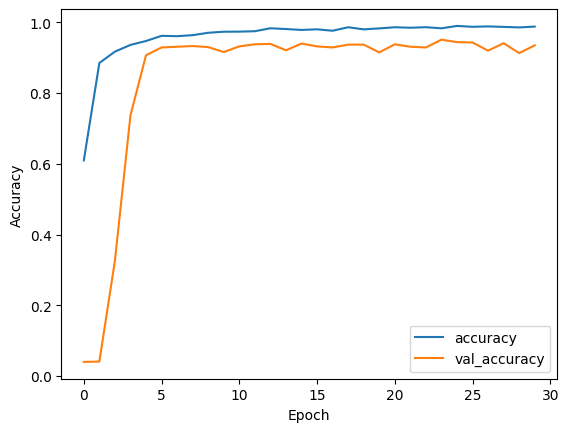

32/32 - 50s - 2s/step - accuracy: 0.9370 - loss: 0.3528

Test accuracy: 0.9369999766349792
32/32 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step
Confusion Matrix:
[[1 2 0 2 0 2 1 0 2 0 3 2 1 2 1 1 2 0 2 0 0 1 0 4 1 1 0 1 0 4]
 [1 0 3 0 0 2 3 3 3 2 3 0 0 0 1 1 1 1 1 0 1 1 0 0 1 2 0 0 0 1]
 [1 1 0 2 0 0 1 1 1 0 1 1 1 0 1 0 1 0 2 0 0 1 0 1 0 1 0 2 2 1]
 [1 2 1 1 2 1 0 3 2 1 2 0 0 2 1 2 0 3 2 2 2 0 2 1 1 2 2 0 1 1]
 [2 2 1 3 0 1 1 2 1 0 0 1 1 1 1 1 0 3 2 1 2 3 0 1 2 0 0 2 1 1]
 [1 1 2 3 0 1 0 0 2 1 0 1 2 2 0 0 1 1 0 2 1 1 0 1 0 1 0 0 1 1]
 [2 0 2 0 0 2 0 1 0 1 1 0 0 1 1 0 1 1 0 0 2 0 2 0 2 2 1 0 1 1]
 [1 1 1 0 3 0 1 1 1 2 0 0 1 0 1 3 4 1 2 3 0 1 1 2 0 2 0 0 0 3]
 [2 2 0 1 1 3 4 2 1 1 2 1 0 2 2 1 0 2 1 2 0 0 0 3 2 1 3 2 0 0]
 [1 0 1 0 2 1 2 1 0 0 0 0 0 1 3 2 2 1 2 1 2 0 0 0 1 1 2 2 1 1]
 [2 0 2 1 1 1 1 1 1 1 2 0 2 0 1 0 0 1 0 2 0 2 0 3 1 0 2 1 3 6]
 [1 4 2 2 0 1 0 1 1 1 0 0 1 0 0 0 2 1 0 1 2 1 0 0 1 0 0 2 0 1]
 [0 3 0 2 1 1 2 2 3 3 0 1 0 1 2 0 1 4 1 2 1 2 0 1 0 1 0 1 2 2]
 [0 2 0 2 3 1 0 1 0 0 1 0 0 0 0 1

In [13]:
# Load pre-trained ResNet50 model without its top layers
base_model = ResNet50(weights='imagenet', include_top=False)                  # Excluding the fully connected layers at the top of the network

# Add custom classification layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)                                               # Reduce the spatial dimensions in feature maps
x = Dense(1024, activation='relu')(x)                                         # Introduces non-linearity, enabling the network to learn complex patterns in the data
x = Dropout(0.5)(x)                                                           # Regularizes the network by randomly setting a fraction of input units to zero during training, reducing overfitting
x = Dense(512, activation='relu')(x)                                          # Additional dense layer
predictions = Dense(len(train_data.class_indices), activation='softmax')(x)   # It outputs the probability distribution over the classes, allowing the model to make predictions

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)                   # Output as the predictions from the custom classification layers

# Fine-tune more layers of the base model
for layer in base_model.layers[:-20]:                                         # Fine-tune more layers : we exclude the last 20 layers 
    layer.trainable = True                                                    # These layers will be trainable during the subsequent training process, allowing their weights to be updated based on the current dataset

# Compile the model with Adam optimizer and a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),      # Stabilize training and fine-tuning on top of a pre-trained model
    loss='categorical_crossentropy',                                          # calculate the model's error during training
    metrics=['accuracy'])                                                     # How well the model is performing in terms of classification accuracy

# Define early stopping criteria                                              # Argument ensures that the model's weights are restored to the best observed state during training
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True) 

# Train the model with more epochs and early stopping
history = model.fit(train_data,
    epochs=30,                                                                # Increased epochs
    validation_data=val_data,                                                 # The model generalizes well to unseen data
    callbacks=[early_stopping])                                               

# Plotting the training and validation accuracy over epochs.
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_data, verbose=2)                   # Computes loss value & accuracy value on the test dataset , verbosity of the evaluation output
print('\nTest accuracy:', test_acc)

# Predictions
predictions = model.predict(test_data)
y_pred = np.argmax(predictions, axis=1)
y_true = test_data.classes

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_names = list(test_data.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

In [22]:
# import module
import tensorflow

# create object
model = tensorflow.keras.Model()

# assign location with correct file extension
path = 'C://Users//vikas//OneDrive//Desktop//SEM2_PROJECTS//EEE//EEE_PRO//ResNet2.weights.h5'

# save
model.save_weights(path)